## Homework 4: Mô Hình Logistic Regression.
### Tổng quan

Trong bài tập này, các bạn sẽ sử dụng kiến thức đã học về logistic regression để giải quyết bài toán phân lớp, cụ thể là **phân loại phương tiện giao thông** (xe hơi và xe máy).

<div style="margin-left: auto;margin-right: auto;width: 60%;" ><img src="./imgs/vehicle_classification.jpg" /></div>

 
### Mục tiêu học tập

* Học cách sử dụng thư viện **Numpy** và **Tensorflow**. 
* Có thể viết các hàm đơn giản với **Numpy** và **Tensorflow** để giải quyết **bài toán Phân loại**.

### Giới thiệu
Để có thể hoàn tấp bài tập này, các bạn cần nắm rõ những kiến thức sau:
* Logistic regression và nguyên tắc hoạt động.
* Cách lấy đạo hàm cho các tham số trong mô hình trên.
* Giải thuật gradient descent.

Những thư viện được sử dụng trong bài tập này bao gồm **numpy** và **Tensorflow**.

Bạn có thể tham khảo lại bài giảng để nắm vững các nội dung này. Ngoài ra, các bạn có thể đặt câu hỏi cho đội ngũ giảng viên nếu có thắc mắc.

*Lưu ý: để tiện cho việc phân biệt giữa lớp python và lớp trong bài toán phân loại, người viết quy ước rằng khi viết **class** nghĩa là đang nói về python class, khi viết **lớp** nghĩa là đang nói đến lớp của dữ liệu cần phân loại.

## Hướng dẫn làm và nộp bài
1./ Ở mỗi bài tập, các bạn sẽ được yêu cầu điền phần còn thiếu vào trong hàm. Các cell cần điền sẽ có dòng đầu tiên như sau:
```python
# GRADED FUNCTION: <tên hàm>
...
```
Trong cell đó, các bạn sẽ code phần đáp án của mình giữa 2 phần:
```python
### START CODE HERE ###
<phần bài làm>
### END CODE HERE ###
```
Sau đó, các bạn trả về giá trị đầu ra của hàm số (nếu có) sau phần `return` (ví du: `return output`, bỏ giá trị **None** đi)

2./ Để kiểm tra lỗi nhanh cho hàm bạn vừa viết, thực hiện chạy phần `Sanity check` ở sau mỗi TO_DO.  

3./ Tiếp theo, sau khi đã vượt qua Sanity check, bạn chạy file `check_score.py` để kiểm tra điểm mà bạn hiện tại cho phần bài làm của bạn. Nếu không thay đổi tên và vị trí mặc định của file bài tập, bạn có thể gọi dòng lệnh sau từ terminal để nộp bài:
```
python check_score.py
```
Nếu bạn đã thay đổi vị trí hoặc tên bài tập. Bạn trỏ đến vị trí của bài tập bằng dòng lệnh sau:
```
python check_score.py -filepath <PATH_ĐẾN_FILE_.IPYNB_BÀI_LÀM_CỦA_BẠN>
```
Sau khi chạy dòng lệnh trên, vui lòng điền `username`, bạn sẽ nhận được kết quả trả về cho bài làm của bạn.  

**Lưu ý:** Bạn có thể kiểm tra điểm bằng cách chạy file `check_score.py` bao nhiêu lần bạn muốn.

## Điểm số
Điểm tối đa cho bài tập này là **100 điểm**. Mỗi bài tập nhỏ TO_DO_x nếu làm đúng hoàn toàn sẽ được **10 điểm**.

#### Nhập thư viện

In [ ]:
pip install googledrivedownloader

In [ ]:
# IMPORT
import pickle
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
eps = 10e-6

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.12.0


## Tải dữ liệu
Các bạn chạy cell bên dưới để tải bộ dữ liệu cũng như các hàm dùng để test cách cài đặt của các bạn:

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='115H--hHJ1uBASZmCi80WdfN_YtrP7Dzh', dest_path='./assignment2.zip', unzip=True)
!rm assignment2.zip

Unzipping...Done.


Dữ liệu tải xuống của bạn bao gồm:
* File `vehicle.data`: dữ liệu cho bài tập
* File `logistic_unittest.npy`: được dungf để kiểm tra một số hàm mà bạn cài đặt.


In [ ]:
ls assignment2

logistic_unittest.npy  vehicles.dat


## Các hàm bổ trợ dùng để đọc dữ liệu
Các hàm bổ trợ trong việc đọc dữ liệu đã được định nghĩa sẵn, các bạn **thực hiện chạy** những hàm này mà không cần chỉnh sửa.

In [ ]:
"""
These functions help you read data from data files.
Author: Kien Huynh
"""


def load_npy(file_name):
    """load_npy
    Load numpy data file. This is needed as python 2.7 pickle uses ascii as default encoding method but python 3.x uses utf-8.abs.

    :param file_name: npy file path
    
    :return obj: loaded numpy object
    """
    
    if (sys.version_info[0] >= 3):
        obj = np.load(file_name, encoding='latin1')
    elif (sys.version_info[0] >=2):
        obj = np.load(file_name)
    
    return obj


def load_list(file_name):
    """load_list
    Load a list object to file_name.

    :param file_name: string, file name
    """
    end_of_file = False
    list_obj = [] 
    f = open(file_name, 'rb')
    python_version = sys.version_info[0]
    while (not end_of_file):
        try:
            if (python_version >= 3):
                list_obj.append(pickle.load(f, encoding='latin1'))
            elif (python_version >=2):
                list_obj.append(pickle.load(f))
        except EOFError:
            end_of_file = True
            print("EOF Reached")

    f.close()
    return list_obj 


def save_list(list_obj, file_name):
    """save_list
    Save a list object to file_name
    
    :param list_obj: List of objects to be saved
    :param file_name: file name.
    """

    f = open(file_name, 'wb')
    for obj in list_obj:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    f.close() 


def get_vehicle_data():
    """
    Load vehicle data and return it as a list: [train_x, train_y, test_x, test_y].
    """
    print('Reading vehicle data...')
    train_x, train_y, test_x, test_y = load_list('./assignment2/vehicles.dat')
    train_x = np.transpose(train_x, (2,0,1))
    test_x = np.transpose(test_x, (2,0,1)) 

    print('Done reading')
    return train_x, train_y, test_x, test_y

## Dữ liệu
Tập dữ liệu Vehicles là tập gồm có 2 lớp: xe hơi và xe máy, được gán nhãn lớp 0 (xe hơi) và 1 (xe máy). Ta có thể đọc tập dữ liệu này bằng hàm `get_vehicle_data()`:

In [ ]:
train_x, train_y, test_x, test_y = get_vehicle_data()
num_train = train_x.shape[0]
num_test = test_x.shape[0]

Reading vehicle data...
EOF Reached
Done reading


Ở đây, `train_x` là một numpy tensor có kích thước `2400 × 64 × 64` (ý nghĩa: tập dữ liệu huấn luyện `train_x` có 2400 mẫu, mỗi mẫu là 1 ảnh có chiều cao (height) và rộng (width) bằng 64).

In [ ]:
train_x.shape

(2400, 64, 64)

`train_y` là ma trận chứa nhãn ứng với mẫu dữ liệu trong `train_x`.

In [ ]:
train_y.shape

(2400, 1)

Tương tự, test_x có kích thước 600 × 64 × 64, mỗi hàng trong test_y biểu diễn cho nhãn của mỗi mẫu trong test_x.



In [ ]:
print(test_x.shape)
print(test_y.shape)

(600, 64, 64)
(600, 1)


Hai tensor `train_x` và `train_y` được dùng cho việc huấn luyện mô hình phân loại; hai tensor `test_x` và `test_y` được dùng cho quá trình đánh giá (test).

Tập dữ liệu này gồm các ảnh xám (gray images), mỗi ảnh chứa một trong hai loại phương tiện di chuyển: xe máy và xe hơi. Mỗi ảnh có thể chứa trọn vẹn hoặc một phần phương tiện. Cần lưu ý là dữ liệu ảnh ở đây chưa được chuẩn hóa, nên các giá trị vẫn nằm trong khoảng từ 0 đến 255.

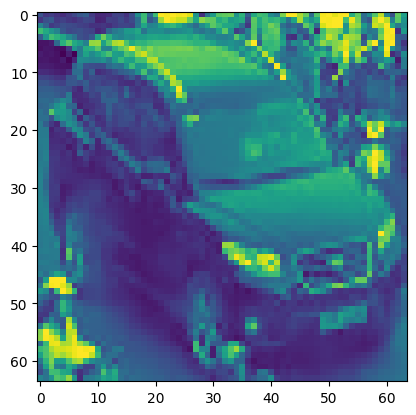

In [ ]:
imgplot = plt.imshow(train_x[0])
plt.show()

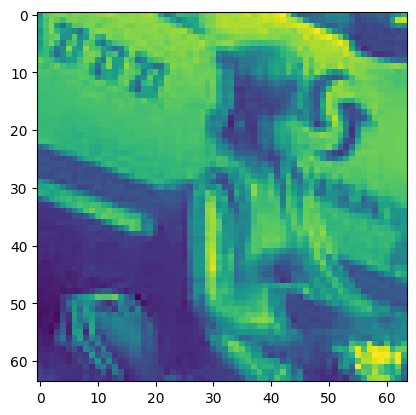

In [ ]:
imgplot = plt.imshow(train_x[2399])
plt.show()

## Chuẩn hóa dữ liệu ảnh
Như đã kể trên, ảnh đầu vào có giá trị từ 0 đến 255. Nếu ta đưa trực tiếp bộ ảnh vào quá trình huấn luyện sẽ làm cho gradient lớn. Vì vậy, trước khi huấn luyện, ta có thể sử dụng phương pháp chuẩn hóa dữ liệu để đưa trung bình (mean) của tập train về 0 và độ lệch chuẩn (standard deviation - std) của nó về 1.

Đối với việc xử lý hình ảnh, ta có hai cách chuẩn hóa khác nhau:
*   (a) Xem mỗi pixel trong ảnh là một đặc trưng riêng rẽ. Ví dụ, pixel [1, 3] và pixel [4, 2] là hai đặc trưng khác nhau, được tính mean và std riêng.
*   (b) Xem các pixel khác nhau trong ảnh là cùng 1 loại đặc trưng. Lúc này, pixel [1, 3] và pixel [4, 2] được xem là cùng 1 loại đặc trưng, được tính mean và std chung.

Trong mục này, bạn cần hiện thực cách chuẩn hóa (a) trong hàm ```normalize_per_pixel``` và cách (b) trong hàm ```normalize_all_pixel```. Giả sử ta có ```m``` ảnh train ```x_0..xm−1```, mỗi ảnh train có R hàng và C cột, thì mean và std tính theo cách (a) sẽ là:

\begin{equation}
\overline{x}_{rc}=\frac{1}{m}\sum_{i=0}^{m-1}x_{rc}^{(i)}, 0 \le r \le R-1,0 \le c \le C-1 \tag{1}
\end{equation}

\begin{equation}
\sigma_{rc}=\sqrt{\frac{1}{m}\sum_{i=0}^{m-1}{(x_{rc}^{(i)}-\overline{x}_{rc})^2}} \tag{2}
\end{equation}

Đối với cách (b) ta sẽ có:

\begin{equation}
\overline{x} = \frac{1}{mRC}\sum_{i=0}^{m-1}{\sum_{r=0}^{R-1}{\sum_{c=0}^{C-1}{x_{rc}^{(i)}}}} \tag{3}
\end{equation}

\begin{equation}
\sigma=\sqrt{\frac{1}{mRC}\sum_{i=0}^{m-1}{\sum_{r=0}^{R-1}{\sum_{c=0}^{C-1}{(x_{rc}^{(i)}-\overline{x})^2}}}} \tag{4}
\end{equation}

Sau khi có được mean và std trên toàn bộ data huấn luyện, ta chuẩn hóa các mẫu trong tập huấn luyện theo cách sau:

\begin{equation}
x^{(i)} = \frac{x^{(i)}-\overline{x}}{\sigma} \tag{5}
\end{equation} 

Đối với cách (a), việc này sẽ được áp dụng riêng cho từng pixel trong số $R\times{C}$. Với cách (b), thì ta dùng chung $\overline{x}$ và $\sigma$ trong công thức (3) và (4) cho toàn bộ tất cả các pixel.

Cần lưu ý rằng $\overline{x}$ và $\sigma$ chỉ được tính trên $m$ mẫu dữ liệu huấn luyện. Sau đó, hai giá trị này sẽ được dùng lại để chuẩn hóa các mẫu dữ liệu test (và validation nếu có). Việc tính $\overline{x}$ và $\sigma$ mà có sử dụng các dữ liệu trong tập test là vi phạm nguyên tắc đánh giá các mô hình học máy. 

### TODO 1: normalize_per_pixel

In [ ]:
# GRADED FUNCTION
def normalize_per_pixel(train_x, test_x):
    """TODO 1: Thực hiện hàm chuẩn hoá từng dự liệu theo từng pixel (xem mỗi pixel là một đặc trưng riêng)
    Hàm này tính giá trị trung bình và độ lệch chuẩn của các pixel nằm ở cùng tọa độ trên tập hình ảnh huấn luyện
        và thực hiện chuẩn hoá dữ liệu trên tập train_x và test_x bằng bằng các giá trị được tính toán này.
    
    Input:
        - train_x: mảng numpy, train_x.shape = (num_samples, image_height, image_width). Là tập dữ liệu ảnh huấn luyện.
        - test_x: mảng numpy, train_x.shape = (num_samples, image_height, image_width). Là tập dữ liệu ảnh kiểm định.
    Output:
        - norm_train_x: tương tự như mảng train_x. Là tập dữ liệu ảnh huấn luyện đã được chuẩn hoá bằng normalize_per_pixel.
        - norm_test_x: tương tự như mảng test_x. Là tập dữ liệu ảnh kiểm định đã được chuẩn hoá bằng normalize_per_pixel.
    Lưu ý: Shape của train_mean và train_std có dạng (1, image_height, image_width)
    """
    norm_train_x = None
    norm_test_x= None
    
    ### START CODE HERE ### (≈4 lines)
    # Calculate the mean and standard deviation for each pixel position
    train_mean = np.mean(train_x, axis=0, keepdims=True)
    train_std = np.std(train_x, axis=0, keepdims=True)

    # Normalize the training and test data
    norm_train_x = (train_x - train_mean) / (train_std + 1e-7)
    norm_test_x = (test_x - train_mean) / (train_std + 1e-7)
    
    return norm_train_x, norm_test_x

    ### END CODE HERE ###
    


In [ ]:
### SANITY CHECK
sc_train_x = np.arange(2*2*3).reshape(2,2,3)
norm_sc_train_x, _ = normalize_per_pixel(sc_train_x, sc_train_x)
eps = 1e-7
assert np.allclose(np.mean(norm_sc_train_x, axis=0), 0, atol=eps), "Mean of each pixel must be close to 0"
assert np.allclose(np.std(norm_sc_train_x, axis=0), 1, atol=eps), "Standard deviation of each pixel must be close to 1"

### TODO 2: normalize_all_pixel

In [ ]:
def normalize_all_pixels(train_x, test_x):
    """TODO 2: Thực hiện hàm chuẩn hoá từng dự liệu trên toàn bộ pixel của ảnh.
    Hàm này tính giá trị trung bình và độ lệch chuẩn của tất cả các pixel có trong tập hình ảnh huấn luyện
        và thực hiện chuẩn hoá dữ liệu trên tập train_x và test_x bằng các giá trị này.
    
    Input:
        - train_x: mảng numpy, train_x.shape = (num_samples, image_height, image_width). Là tập dữ liệu ảnh huấn luyện.
        - test_x: mảng numpy, train_x.shape = (num_samples, image_height, image_width). Là tập dữ liệu ảnh kiểm định.
    Output:
        - norm_train_x: tương tự như mảng train_x. Là tập dữ liệu ảnh huấn luyện đã được chuẩn hoá bằng normalize_all_pixel.
        - norm_test_x: tương tự như mảng test_x. Là tập dữ liệu ảnh kiểm định đã được chuẩn hoá bằng normalize_all_pixel.
    Lưu ý: Shape của train_mean và train_std có dạng (1, 1, 1)
    """
    norm_train_x = None
    norm_test_x = None

    # Calculate the mean and standard deviation over all pixels
    train_mean = np.mean(train_x)
    train_std = np.std(train_x)

    # Normalize the training and test data
    norm_train_x = (train_x - train_mean) / (train_std + 1e-7)
    norm_test_x = (test_x - train_mean) / (train_std + 1e-7)
    
    return norm_train_x, norm_test_x

In [ ]:
### SANITY CHECK
sc_train_x = np.arange(2*2*3).reshape(2,2,3)
norm_sc_train_x, _ = normalize_all_pixels(sc_train_x, sc_train_x)
eps = 1e-7
assert np.allclose(np.mean(norm_sc_train_x, axis=0), 0, atol=eps), "Mean of each pixel must be close to 0"
assert np.allclose(np.std(norm_sc_train_x, axis=0), 1, atol=eps), "Standard deviation of each pixel must be close to 1"

## Duỗi dữ liệu

Dữ liệu ở bước trên vẫn còn ở dạng tensor 3D ($2400 \times 64 \times 64$). Để có thể thực hiện các phép nhân ma trận trong bài toán logistic regression, ta cần chuẩn chúng về dạng tensor 2D ($2400 \times 4096$). Các bạn cần thực hiện bước này trong hàm `reshape2D`.

### TODO 3: reshape2D

In [ ]:
def reshape2D(tensor):
    """TODO 3: Biến đổi shape mảng 3D thành mảng 2D
    Input:
        - tensor: mảng numpy, tensor.shape = (num_samples, image_height, image_width). Là mảng tensor 3D đầu vào.
    Output:
        - result: mảng numpy, tensor.shape = (num_samples, image_height*image_width). Là kết quả của mảng đã được biến đổi.
    """
    result = None
    ### START CODE HERE ### (≈1 line)
    result = tensor.reshape(tensor.shape[0], -1)
    ### END CODE HERE ###
    return result

In [ ]:
### SANITY CHECK
tensor = np.arange(2*3*4).reshape(2,3,4)
assert sum(reshape2D(tensor).shape)==14, "Chưa đúng"

## Thêm đặc trưng 1 vào dữ liệu
Để tính tích vô hướng dễ dàng, nối thêm một cột có giá trị bằng 1 vào `train_x` và `test_x` (concatenate có axis=1). Trong file có sẵn hàm `add_one` và ta nên thực hiện code trong hàm này. Sau bước này, dữ liệu huấn luyện sẽ có kích thước $2400 \times 4097$.

### TODO 4: add_one

In [ ]:
def add_one(tensor):
    """TODO 4: Thêm một đặc trưng có giá trị 1 vào dữ liệu đầu vào.
    
    Input:
        - tensor: mảng numpy, tensor.shape = (num_samples, num_feat). Là mảng tensor 2D chiều đầu vào.
    Output:
        - result: mảng numpy, tensor.shape = (num_samples, num_feat + 1). Là kết quả của mảng đã được biến đổi.
    """
    result = None
    ### START CODE HERE ### (≈1 line)
    ones = np.ones((tensor.shape[0], 1))
    result = np.concatenate((ones, tensor), axis=1)
    ### END CODE HERE ###
    return result

In [ ]:
### SANITY CHECK
sc_train_x = np.arange(2*3).reshape(2,3)
assert add_one(sc_train_x).sum() == 17, "Chưa đúng"

## Class LogisticClassifier: Logistic Regression với numpy

Nhằm hỗ trợ cho việc lập trình, đội ngũ TA cung cấp sẵn cho các bạn class **LogisticClassifier**. Một trong các thành phần chính của class LogisticClassifier là `w`, tham số mà ta cần tìm khi huấn luyện. Tham số này là một mảng có số hàng bằng số đặc trưng của dữ liệu đầu vào, số cột bằng 1. Cụ thể trong bài toán phân loại ảnh xe này, `w` sẽ là một ma trận $4097\times{1}$. `w` được khởi tạo ngẫu nhiên trong hàm `__init__(w_shape)`. Để truy xuất `w` từ bên trong class, ta dùng `self.w`, ví dụ:
```python
class LogisticClassifier(object):
    def feed_forward(self, x):
        print(self.w)
```
***Lưu ý: Không giữ các hàm "print" khi nộp bài hoặc kiểm tra điểm (check_score.py). Hàm này có thể gây ra lỗi hệ thống.**

Để truy xuất w từ bên ngoài class, ta cần có một thực thể của class và gọi thông qua thực thể này, ví dụ:
```python
if __name__ == "__main__":
    num_feature = train_x.shape[1]
    bin_classifier = LogisticClassifier((num_feature, 1))
    print(bin_classifier.w)
```

Đối với các hàm thuộc class **LogisticClassifier**, việc truy xuất cũng hoàn toàn giống với `w`. Chúng sẽ được mô tả chi tiết trong mục tiếp theo.

### Tính các giá trị phân loại

Các giá trị phân loại, $\hat{y}$, sẽ được tính trong hàm `feed_forward` của class `LogisticClassifier`. Công thức tính như sau:

\begin{equation}
z = xw  \tag{6}
\end{equation}
\begin{equation}
\hat{y} = \frac{1}{1+e^{-z}} \tag{7}
\end{equation}

Ở đây, $w = [w_0, w_1,.., w_{4096}]^T$ là các tham số cần học (lưu trong biến `self.w` trong class `LogisticClassifier`). Lẽ ra công thức (6) được viết là $z=xw+w_{4096}$, tuy nhiên ở bước trên ta đã thêm 1 vào làm đặc trưng cuối cho tất cả các mẫu. Việc này giúp cho quá trình nhân ma trận và quản lý các biến gọn hơn.

#### TODO 5: feed_forward
Các bạn hoàn thành hàm `feed_forward()` trong class `LogisticClassifier` ở trên

### Tính độ lỗi

Việc tính độ lỗi được thực hiện trong hàm `compute_loss` của class `LogisticClassifier`. Công thức tính độ lỗi như sau:

\begin{equation}
J(w) = -\frac{1}{m}\sum_{i=0}^{m-1}(y^{(i)}\log{\hat{y}^{(i)}} + (1-y^{(i)})\log(1-\hat{y}^{(i)})) \tag{8}
\end{equation}

Trong đó:
-  $y^{(i)}$ là nhãn của mẫu thứ $i$, mẫu thuộc lớp 0 sẽ có $y^{(i)}=0$, mẫu thuộc lớp 1 sẽ có $y^{(i)}=1$. Ta có thể truy cập các nhãn này thông qua biến `train_y` và `test_y`.
- $\hat{y}^{(i)} \in (0, 1)$ là phần tử thứ $i$ trong vector $\hat{y}$.
- $m=2400$ là tổng số mẫu huấn luyện.


Để tính trung bình trên ma trận theo hàng hoặc cột, ta có thể sử dụng hàm `np.mean()` với tham số axis tương ứng.

#### TODO 6: compute_loss
Các bạn hoàn thành hàm `compute_loss()` trong class `LogisticClassifier` ở trên.

### Tính đạo hàm
Để tính đạo hàm riêng cho thành phần $w_j$ trong $w$ trong hàm `get_grad`, ta dùng công thức sau:
\begin{equation}
\frac{\partial  J(w_j)}{\partial w_j} = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})x^{(i)}_j \tag{9}
\end{equation}

Trong trường hợp này, sau khi thêm 1 vào `train_x` thì ta sẽ có $0 \le j \le 4096$.

#### TODO 7: get_grad
Các bạn hoàn thành hàm `get_grad()` trong class `LogisticClassifier` ở trên.

### Cập nhật $w$
Để huấn luyện được mô hình phân loại trong hàm `update_weight`, ta cần cập nhật $w$ theo công thức sau:
\begin{equation}
w = w - \alpha\times\frac{\partial  J(w)}{\partial w} \tag{10}
\end{equation}

Với $\alpha$ là hệ số học (`learning_rate`).

#### TODO 8: update_weight
Các bạn hoàn thành hàm `update_weight()` trong class `LogisticClassifier` ở trên.

### Cập nhật $w$ dùng momentum

Giải thuật cập nhật trình bày trong phần trước có điểm yếu là chậm và dễ rơi vào tối ưu cục bộ. Tuy trong bài này, giải thuật đó cũng đủ để giải quyết, nhưng ta vẫn có thể sử dụng giải thuật có quán tính để việc huấn luyện diễn ra nhanh hơn.

Khởi tạo ma trận quán tính trước khi vào vòng lặp chính:
\begin{equation}
\Delta w = 0 \tag{11}
\end{equation}

Ở đây, $\Delta w$ là ma trận có kích thước bằng chính kích thước của $w$. Quá trình cập nhật $w$ sẽ được diễn ra như sau:
\begin{equation}
\Delta w = \gamma\Delta w + \alpha\frac{\partial  J(w)}{\partial w} \tag{12}
\end{equation}

\begin{equation}
w = w - \Delta w \tag{13}
\end{equation}

Với $\gamma$ là hệ số quán tính (thường được đặt là 0.9).

In [ ]:
# GRADED FUNCTION
class LogisticClassifier(object):
    def __init__(self, w_shape):
        mean = 0
        std = 1
        self.w = np.random.normal(0, np.sqrt(2./np.sum(w_shape)), w_shape)


    def feed_forward(self, x):
        z = np.dot(x, self.w)
        y_hat = 1. / (1. + np.exp(-z))
        return y_hat



    def compute_loss(self, y, y_hat):
        return -np.mean(y*np.log(y_hat + 1e-8) + (1-y)*np.log(1 - y_hat + 1e-8))



    def get_grad(self, x, y, y_hat):
        return np.mean((y_hat - y)*x, axis=0, keepdims=True).T



    def update_weight(self, grad, learning_rate):
        self.w = self.w - learning_rate*grad
        return self.w

    def numerical_check(self, x, y, grad):
        eps = 1e-4
        w_test0 = np.copy(self.w)
        w_test1 = np.copy(self.w)
        w_test0[2] = w_test0[2] - eps
        w_test1[2] = w_test1[2] + eps

        y_hat0 = np.dot(x, w_test0)
        y_hat0 = 1. / (1. + np.exp(-y_hat0))
        loss0 = self.compute_loss(y, y_hat0) 

        y_hat1 = np.dot(x, w_test1)
        y_hat1 = 1. / (1. + np.exp(-y_hat1))
        loss1 = self.compute_loss(y, y_hat1) 

        numerical_grad = (loss1 - loss0) / (2 * eps)
        return numerical_grad

In [ ]:
### SANITY CHECK
eps = 0.001        
classifer = LogisticClassifier((3,1))
classifer.w = np.arange(3*1).reshape(3,1)
x = np.ones(2*3).reshape(2,3)
y = np.ones(2).reshape(2,1)

# TODO 5
y_hat = classifer.feed_forward(x)
assert abs(sum(y_hat) - 1.905) < eps, "Chưa đúng"
# TODO 6
loss = classifer.compute_loss(y, y_hat)
assert abs(loss - 0.048) < eps, "Chưa đúng"
# TODO 7
grad = classifer.get_grad(x, y, y_hat)
assert abs(sum(grad) + 0.142) < eps, "Chưa đúng"
# TODO 8
updateweight = classifer.update_weight(grad, 0.1)
assert abs(sum(updateweight) - 3.014) < eps, "Chưa đúng"

### Đánh giá mô hình phân loại
Để đánh giá mô hình phân loại trên tập kiểm thử (`test_x` và `test_y`), trước tiên, ta cần thực hiện tính các giá trị dự đoán của mô hình trên`test_x`. Sau khi đã có các giá trị này, ta sử dụng các tiêu chí sau để đánh giá mô hình:

\begin{equation}
Precision = \frac{TP}{TP+FP} \tag{14}
\end{equation}

\begin{equation}
Recall = \frac{TP}{P} \tag{15}
\end{equation}

\begin{equation}
F_1-score = 2\times\frac{Precision\times Recall}{Precision+Recall} \tag{16}
\end{equation}

Trong đó:
- Lớp positive là lớp có giá trị y = 1.
- TP (true positive) là tổng số các mẫu mà mô hình dự đoán là positive. ($\hat{y}=1$) và thực sự có nhãn là positive ($y=1$).
- FP (false positive) là tổng số các mẫu mô hình dự đoán là positive($\hat{y}=1$) nhưng thực chất có nhãn là negative ($y=0$).
- P là tổng số mẫu positive trong tập test.

Nhiệm vụ của bạn trong bước này là tính các thông số trên trong hàm `test`. Khi tiến hành kiểm thử, người ra đề đã tính được các giá trị $Precision=0.766$, $Recall=0.830$ và $F_1-score=0.797$. Bạn hãy cố gắng hoàn thiện bài làm của mình để đạt kết quả tương tự hoặc tốt hơn.


#### TODO 9: Evaluation

In [ ]:
def evaluation(y_hat, y, thres=0.5):
    # Convert probabilities into binary outputs
    y_pred = np.where(y_hat >= thres, 1, 0)

    # Compute true positive, false positive, true negative, false negative
    tp = np.sum((y == 1) & (y_pred == 1))
    fp = np.sum((y == 0) & (y_pred == 1))
    tn = np.sum((y == 0) & (y_pred == 0))
    fn = np.sum((y == 1) & (y_pred == 0))

    # Compute precision, recall and f1
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1

In [ ]:
### SANITY CHECK
y_hat = np.array([0.4, 0.7, 0.8, 0.3, 0.2])
y = np.array([0, 1, 1, 0, 0])
assert sum(evaluation(y_hat, y)) == 3, "Chưa đúng"

### Vòng lặp huấn luyện

Vòng lặp của quá trình huấn luyện được xây dựng trong đoạn code sau đây. 
Tất cả khung sườn cho việc thực thi đã được lập trình sẵn. Bạn có thể thay đổi hai siêu tham số tác động đến quá trình huấn luyện, gồm có:

- `num_epoch`: số lượng vòng lặp cho quá trình huấn luyện.
- `learning_rate`: hệ số học $\alpha$.  


Tham số phụ:
- `display_step`: số lượng epochs cần đạt được để vẽ đồ thị độ lỗi trong lúc huấn luyện.

In [ ]:
# Khai báo các siêu tham số
normalize_method = "all_pixels"
num_epoch = 14 
learning_rate = 0.001 
batch_size = 32
num_classes = 2
display_step = 100
np.random.seed(2020)
tf.random.set_seed(2020)

In [ ]:
def plot_loss(all_loss):
    plt.figure(1)
    plt.clf()
    plt.plot(all_loss)

In [ ]:
# Chuẩn hoá dữ liệu: Chọn một tron 2 methods mà bạn đã định nghĩa sẵn
if normalize_method == "all_pixels":
    train_x, test_x = normalize_all_pixels(train_x, test_x) 
else:
    train_x, test_x = normalize_per_pixel(train_x, test_x) 

# Reshape dữ liệu
train_x = reshape2D(train_x)
test_x = reshape2D(test_x)

# Thêm giá trị 1.0 như feature cuối cùng của train_x và test_x
train_x = add_one(train_x) 
test_x = add_one(test_x)

# Tạo classifier
num_feature = train_x.shape[1]
bin_classifier = LogisticClassifier((num_feature, 1))
momentum = np.zeros_like(bin_classifier.w)

# Huấn luyện mô hình
all_loss = []
plt.ion()
for e in range(num_epoch):    
    y_hat = bin_classifier.feed_forward(train_x)
    loss = bin_classifier.compute_loss(train_y, y_hat)
    grad = bin_classifier.get_grad(train_x, train_y, y_hat)

    # Cập nhật trọng số weight
    bin_classifier.update_weight(grad, learning_rate)
    all_loss.append(loss) 

    if (e % display_step == display_step-1):
        plot_loss(all_loss)
        plt.show()
        plt.pause(0.1)     
        print("Epoch %d: loss là %.5f" % (e+1, loss))

# Đánh giá mô hình
y_hat = bin_classifier.feed_forward(test_x)
precision, recall, f1 = evaluation(y_hat, test_y)
print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("F1-score: %.3f" % f1)

Precision: 0.742
Recall: 0.653
F1-score: 0.695


## Class LogisticRegressionTF: Logistic regression với Tensorflow
Chúng ta sử dụng tensorflow eager execution để cài đặt mô hình logistic regression. Với tf eager execution, giá trị của các biến được tính toán ngay lập tức thay vì xây dựng computational graph để chạy sau đó. Một trong những lợi ích thiết thực nhất là giúp chúng ta dễ dàng debug mô hình, xây dựng được dynamic model.

Để xây dựng mô hình bằng eager execution, chúng ta thường định nghĩa một lớp đối tượng như mình họa ở dưới.

Chúng ta kế thừa lớp Model và cài đặt 2 hàm chính:
- init: khởi tạo tất cả các tham số. 
- call: hàm dùng cho feedforward.

In [ ]:
class LogisticRegressionTF(tf.keras.Model):

    def __init__(self, num_class):
        super(LogisticRegressionTF, self).__init__()
        # init all weights here
        self.dense = tf.keras.layers.Dense(num_class)

    def call(self, inputs, training=None, mask=None):
        output = self.dense(inputs)
        
        output = tf.nn.softmax(output)        
        return output

#### One-hot vector
One-hot vector là một vector có giá trị nguyên, trong đó chỉ 1 phần tử có giá trị $1$, còn lại toàn bộ các phần tử khác đều có giá trị $0$.


Một giá trị số nguyên dương $k$ bất kì có thể được biểu diễn dưới dạng 1 one-hot vector thông qua một hàm one-hot encoder đơn giản. Trong vector này phần tử vị trí $k$ có giá trị $1$.

### TODO 10: Định nghĩa one-hot encoder

In [ ]:
def create_one_hot(y, num_class=10):
    # Initialize a zero matrix with shape (len(y), num_class)
    eye_mat = np.zeros((len(y), num_class))

    # Assign 1 to the column that corresponds to the class label
    eye_mat[np.arange(len(y)), y.T] = 1

    return eye_mat

In [ ]:
# Khai báo siêu tham số huấn luyện
n_samples = raw_train_X.shape[0]
learning_rate = 0.005
training_epochs = 10000
batch_size = n_samples # Full Batch Gradient Descent

display_step = 1000
n_samples, dimension = raw_train_X.shape

# Khai báo các tensors input, output bằng kiểu tf.constant trong tensorflow.
train_X = tf.constant(raw_train_X, dtype=tf.float64)

train_Y = tf.reshape(tensor=train_Y, shape=(-1, 1))
train_Y = tf.constant(train_Y, dtype=tf.float64) 

# Khai báo các tensors trọng số bằng kiểu tf.Variable trong tensorflow.
## Khởi tạo trọng số cho quá trình huấn luyện bằng np.random.normal
W = tf.Variable(np.random.normal(size=(dimension, 1)), trainable=True) 
b = tf.Variable(np.random.normal(size=(1, 1)), trainable=True)

NameError: ignored

In [ ]:
### SANITY CHECK
x = [1, 2, 3]
y = create_one_hot(x, 4)
assert y.shape == (3,4), "Chưa đúng"
assert sum(np.argmax(y, axis=0)) == 3, "Chưa đúng"

### Huấn luyện mô hình với Tensorflow

In [ ]:
# Khai báo các siêu tham số
normalize_method = "all_pixels"
num_epoch = 14 
learning_rate = 0.001 
batch_size = 32
num_classes = 2
np.random.seed(2020)
tf.random.set_seed(2020)

In [ ]:
# Chuẩn hoá dữ liệu: Chọn một tron 2 methods mà bạn đã định nghĩa sẵn
if normalize_method == "all_pixels":
    train_x, test_x = normalize_all_pixels(train_x, test_x) 
else:
    train_x, test_x = normalize_per_pixel(train_x, test_x) 

# Reshape dữ liệu
train_x = reshape2D(train_x)
test_x = reshape2D(test_x)
train_y = create_one_hot(train_y.astype('int32').flatten().tolist(), num_class=2)
test_y = create_one_hot(test_y.astype('int32').flatten().tolist(), num_class=2)

device = '/cpu:0' if len(tf.config.experimental.list_physical_devices('GPU')) == 0 else '/gpu:0'

with tf.device(device):
    # Xây dựng model và hàm optimizer
    model = LogisticRegressionTF(num_classes)
    model.compile(optimizer=tf.optimizers.Adam(learning_rate), loss='binary_crossentropy',
                  metrics=['accuracy'])
    

    # Huấn luyện mô hình.
    model.fit(train_x, train_y, batch_size=batch_size, epochs=num_epoch,
              validation_data=(test_x, test_y), verbose=2)

    # Đánh giá mô hình
    scores = model.evaluate(test_x, test_y, 32, verbose=2)
    
    y_hat = model.predict(test_x)
    precision, recall, f1 = evaluation(y_hat, test_y)
    print("Precision: %.3f" % precision)
    print("Recall: %.3f" % recall)
    print("F1-score: %.3f" % f1)